In [12]:
%autosave 60
import keras 
import numpy as np
import sklearn.model_selection as sk
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import VGG19
from keras.applications.resnet50 import ResNet50
from keras.utils import multi_gpu_model
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt

Autosaving every 60 seconds


In [3]:
image_width = 224
image_height = 224

train_data_dir = '../Fruit360/fruits-360/Training/'
test_data_dir = '../Fruit360/fruits-360/Test/'


#generators automatically turn image files on disk into batches of processed tensors 
# use data augmentation 
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.1) #split 10% data as validation dataset 
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=16,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=16,
    class_mode='categorical',
    subset='validation')
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=16,
    class_mode='categorical')
# all labels in training dataset 
#train_generator.class_indices

Found 44034 images belonging to 95 classes.
Found 4871 images belonging to 95 classes.
Found 16421 images belonging to 95 classes.


In [4]:
number_of_class = 95

model = Sequential()
# kernel_size:(3,3)->specify the height and width of the 2D convolution window
#"SAME": output size is the same as input size. 
#This requires the filter window to slip outside input map(need to pad)
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(image_width,image_height,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten the input. Do not affect the batch size.
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(number_of_class))
model.add(Activation('softmax'))

# decay: Learning rate decay over each update
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
fit_model=model.fit_generator(train_generator,
                    steps_per_epoch=32,validation_steps=50,epochs=100,verbose=1,
                    validation_data=validation_generator)
performance = model.evaluate_generator(test_generator,steps=32)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
32/32 [==============================] - 48s 1s/step - loss: 4.8860 - acc: 0.0176 - val_loss: 4.5423 - val_acc: 0.0563
Epoch 2/100
32/32 [==============================] - 45s 1s/step - loss: 4.4957 - acc: 0.0293 - val_loss: 4.5125 - val_acc: 0.0288
Epoch 3/100
32/32 [==============================] - 45s 1s/step - loss: 4.3496 - acc: 0.0488 - val_loss: 4.3831 - val_acc: 0.0325
Epoch 4/100
32/32 [==============================] - 45s 1s/step - loss: 4.2988 - acc: 0.0410 - val_loss: 4.2509 - val_acc: 0.0813
Epoch 5/100
32/32 [==============================] - 45s 1s/step - loss: 4.2158 - acc: 0.0410 - val_loss: 4.1423 - val_acc: 0.0488
Epoch 6/100
32/32 [==============================] - 45s 1s/step - loss: 4.0838 - acc: 0.0566 - val_loss: 4.07

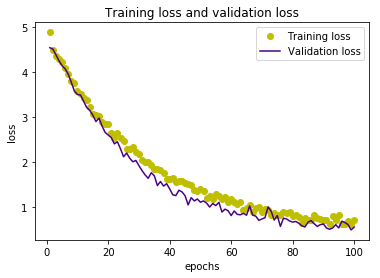

In [7]:
loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'indigo', label='Validation loss')
plt.title('Training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

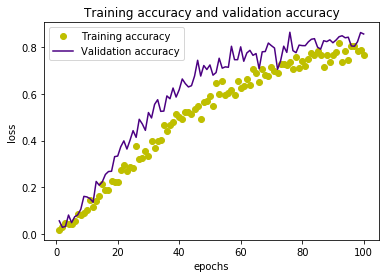

In [9]:
plt.clf()
acc = fit_model.history['acc']
val_acc = fit_model.history['val_acc']
plt.plot(epochs, acc, 'yo', label='Training accuracy')
plt.plot(epochs, val_acc, 'indigo', label='Validation accuracy')
plt.title('Training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [5]:
number_of_class = 95

model = Sequential()
# kernel_size:(3,3)->specify the height and width of the 2D convolution window
#"SAME": output size is the same as input size. 
#This requires the filter window to slip outside input map(need to pad)
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(image_width,image_height,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten the input. Do not affect the batch size.
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(number_of_class))
model.add(Activation('softmax'))

# decay: Learning rate decay over each update
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
fit_model=model.fit_generator(train_generator,
                    steps_per_epoch=32,validation_steps=50,epochs=100,verbose=1,
                    validation_data=validation_generator)
performance = model.evaluate_generator(test_generator,steps=32)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])


Epoch 1/100
32/32 [==============================] - 56s 2s/step - loss: 4.5648 - acc: 0.0078 - val_loss: 4.5337 - val_acc: 0.0262
Epoch 2/100
32/32 [==============================] - 55s 2s/step - loss: 4.4935 - acc: 0.0273 - val_loss: 4.4216 - val_acc: 0.0250
Epoch 3/100
32/32 [==============================] - 53s 2s/step - loss: 4.2934 - acc: 0.0352 - val_loss: 4.2727 - val_acc: 0.0392
Epoch 4/100
32/32 [==============================] - 51s 2s/step - loss: 4.1399 - acc: 0.0625 - val_loss: 4.0725 - val_acc: 0.0925
Epoch 5/100
32/32 [==============================] - 51s 2s/step - loss: 3.8676 - acc: 0.0742 - val_loss: 3.8475 - val_acc: 0.0912
Epoch 6/100
32/32 [==============================] - 51s 2s/step - loss: 3.8077 - acc: 0.0898 - val_loss: 3.6875 - val_acc: 0.1037
Epoch 7/100
32/32 [==============================] - 52s 2s/step - loss: 3.7493 - acc: 0.0781 - val_loss: 3.5947 - val_acc: 0.1350
Epoch 8/100
32/32 [==============================] - 52s 2s/step - loss: 3.5355 - a

In [13]:
number_of_class = 95
conv_base = VGG19(weights = 'imagenet',
                  include_top = False,
                  input_shape=(image_width,image_height,3))
#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation='softmax'))

print('The number of trainable weights before conv_base is frozen:', len(model.trainable_weights))
# avoid the weights from pretrained model are modified during training 
conv_base.trainable = False
print('The number of trainable weights after conv_base is frozen:', len(model.trainable_weights))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
fit_model_vgg = model.fit_generator(train_generator,
                    steps_per_epoch=32,validation_steps=50,epochs=100,verbose=1,
                    validation_data=validation_generator)
performance = model.evaluate_generator(test_generator,steps=32)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

The number of trainable weights before conv_base is frozen: 36
The number of trainable weights after conv_base is frozen: 4
Epoch 1/100
32/32 [==============================] - 92s 3s/step - loss: 4.6238 - acc: 0.0234 - val_loss: 4.4180 - val_acc: 0.0488
Epoch 3/100
32/32 [==============================] - 92s 3s/step - loss: 4.5178 - acc: 0.0156 - val_loss: 4.3523 - val_acc: 0.0663
Epoch 4/100
32/32 [==============================] - 92s 3s/step - loss: 4.4927 - acc: 0.0176 - val_loss: 4.3452 - val_acc: 0.0455
Epoch 5/100
32/32 [==============================] - 92s 3s/step - loss: 4.4150 - acc: 0.0430 - val_loss: 4.2670 - val_acc: 0.0887
Epoch 6/100
32/32 [==============================] - 92s 3s/step - loss: 4.3431 - acc: 0.0625 - val_loss: 4.1682 - val_acc: 0.1550
Epoch 7/100
32/32 [==============================] - 92s 3s/step - loss: 4.2856 - acc: 0.0684 - val_loss: 4.1371 - val_acc: 0.1138
Epoch 8/100
32/32 [==============================] - 92s 3s/step - loss: 4.2296 - acc: 0.0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
number_of_class = 95
conv_base = ResNet50(weights = 'imagenet',
                  include_top = False,
                  input_shape=(image_width,image_height,3))
#conv_base.summary()

model_resnet = Sequential()
model_resnet.add(conv_base)
model_resnet.add(Flatten())
model_resnet.add(Dense(1024,activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(Dense(number_of_class,activation='softmax'))

print('The number of trainable weights before conv_base is frozen:', len(model_resnet.trainable_weights))
# avoid the weights from pretrained model are modified during training 
conv_base.trainable = False
print('The number of trainable weights after conv_base is frozen:', len(model_resnet.trainable_weights))

model_resnet.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
fit_model=model_resnet.fit_generator(train_generator,
                    steps_per_epoch=32,validation_steps=50,epochs=100,verbose=1,
                    validation_data=validation_generator)
performance = model_resnet.evaluate_generator(test_generator,steps=32)
print("The test loss is",performance[0])
print("The test accuracy is",performance[1])

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


The number of trainable weights before conv_base is frozen: 216
The number of trainable weights after conv_base is frozen: 4
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
32/32 [==============================] - 56s 2s/step - loss: 6.5034 - acc: 0.0449 - val_loss: 4.9698 - val_acc: 0.0163
Epoch 2/100
32/32 [==============================] - 48s 2s/step - loss: 4.8907 - acc: 0.0938 - val_loss: 4.9005 - val_acc: 0.0225
Epoch 3/100
32/32 [==============================] - 48s 2s/step - loss: 4.3363 - acc: 0.1289 - val_loss: 4.9291 - val_acc: 0.0175
Epoch 4/100
32/32 [==============================] - 48s 1s/step - loss: 3.9086 - acc: 0.1875 - val_loss: 4.8551 - val_acc: 0.0187
Epoch 5/100
32/32 [==============================] - 48s 2s/step - loss: 3.5016 - acc: 0.2246 - val_loss: 4.9163 - val_acc: 0.0213
Epoch 6/100
32/32 [==============================] - 48s 2s/step - loss: 3.3794 - acc: 0.2598 - val_loss: 4.8887 - val_acc: 0.0125
Epoch 7/100
32/32 [======================

KeyboardInterrupt: 